In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('german_credit.csv')

## Database description

In [3]:
# Check the types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [4]:
# Check if there are missing values
pd.DataFrame({'missing_values': df.isnull().sum(), 'missing_percentage': df.isnull().mean() * 100})

,missing_values,missing_percentage
Creditability,0,0.0
Account Balance,0,0.0
Duration of Credit (month),0,0.0
Payment Status of Previous Credit,0,0.0
Purpose,0,0.0
Credit Amount,0,0.0
Value Savings/Stocks,0,0.0
Length of current employment,0,0.0
Instalment per cent,0,0.0
Sex & Marital Status,0,0.0


### Data dictionary

<div align="center">
    <img src="dictionary.png" width="600" align="middle">
</div>


In [5]:
# Describe the data
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [6]:
# Check if there are duplicated rows
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

## Processamento dos dados

In [7]:
df['Gender'] = df['Sex & Marital Status'].map({1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'})

age_bins = [0, 25, 39, 59, 64, 100]
age_labels = ['0 <=...<= 25', '26<=...<39', '40<=...<=59', '60<=...<=64', '>=65']
df['Age Group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=age_labels)

df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Gender,Age Group
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,Male,0 <=...<= 25
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,Male,26<=...<39
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,Male,0 <=...<= 25
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,Male,26<=...<39
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,Male,26<=...<39


## Exploratory Analysis

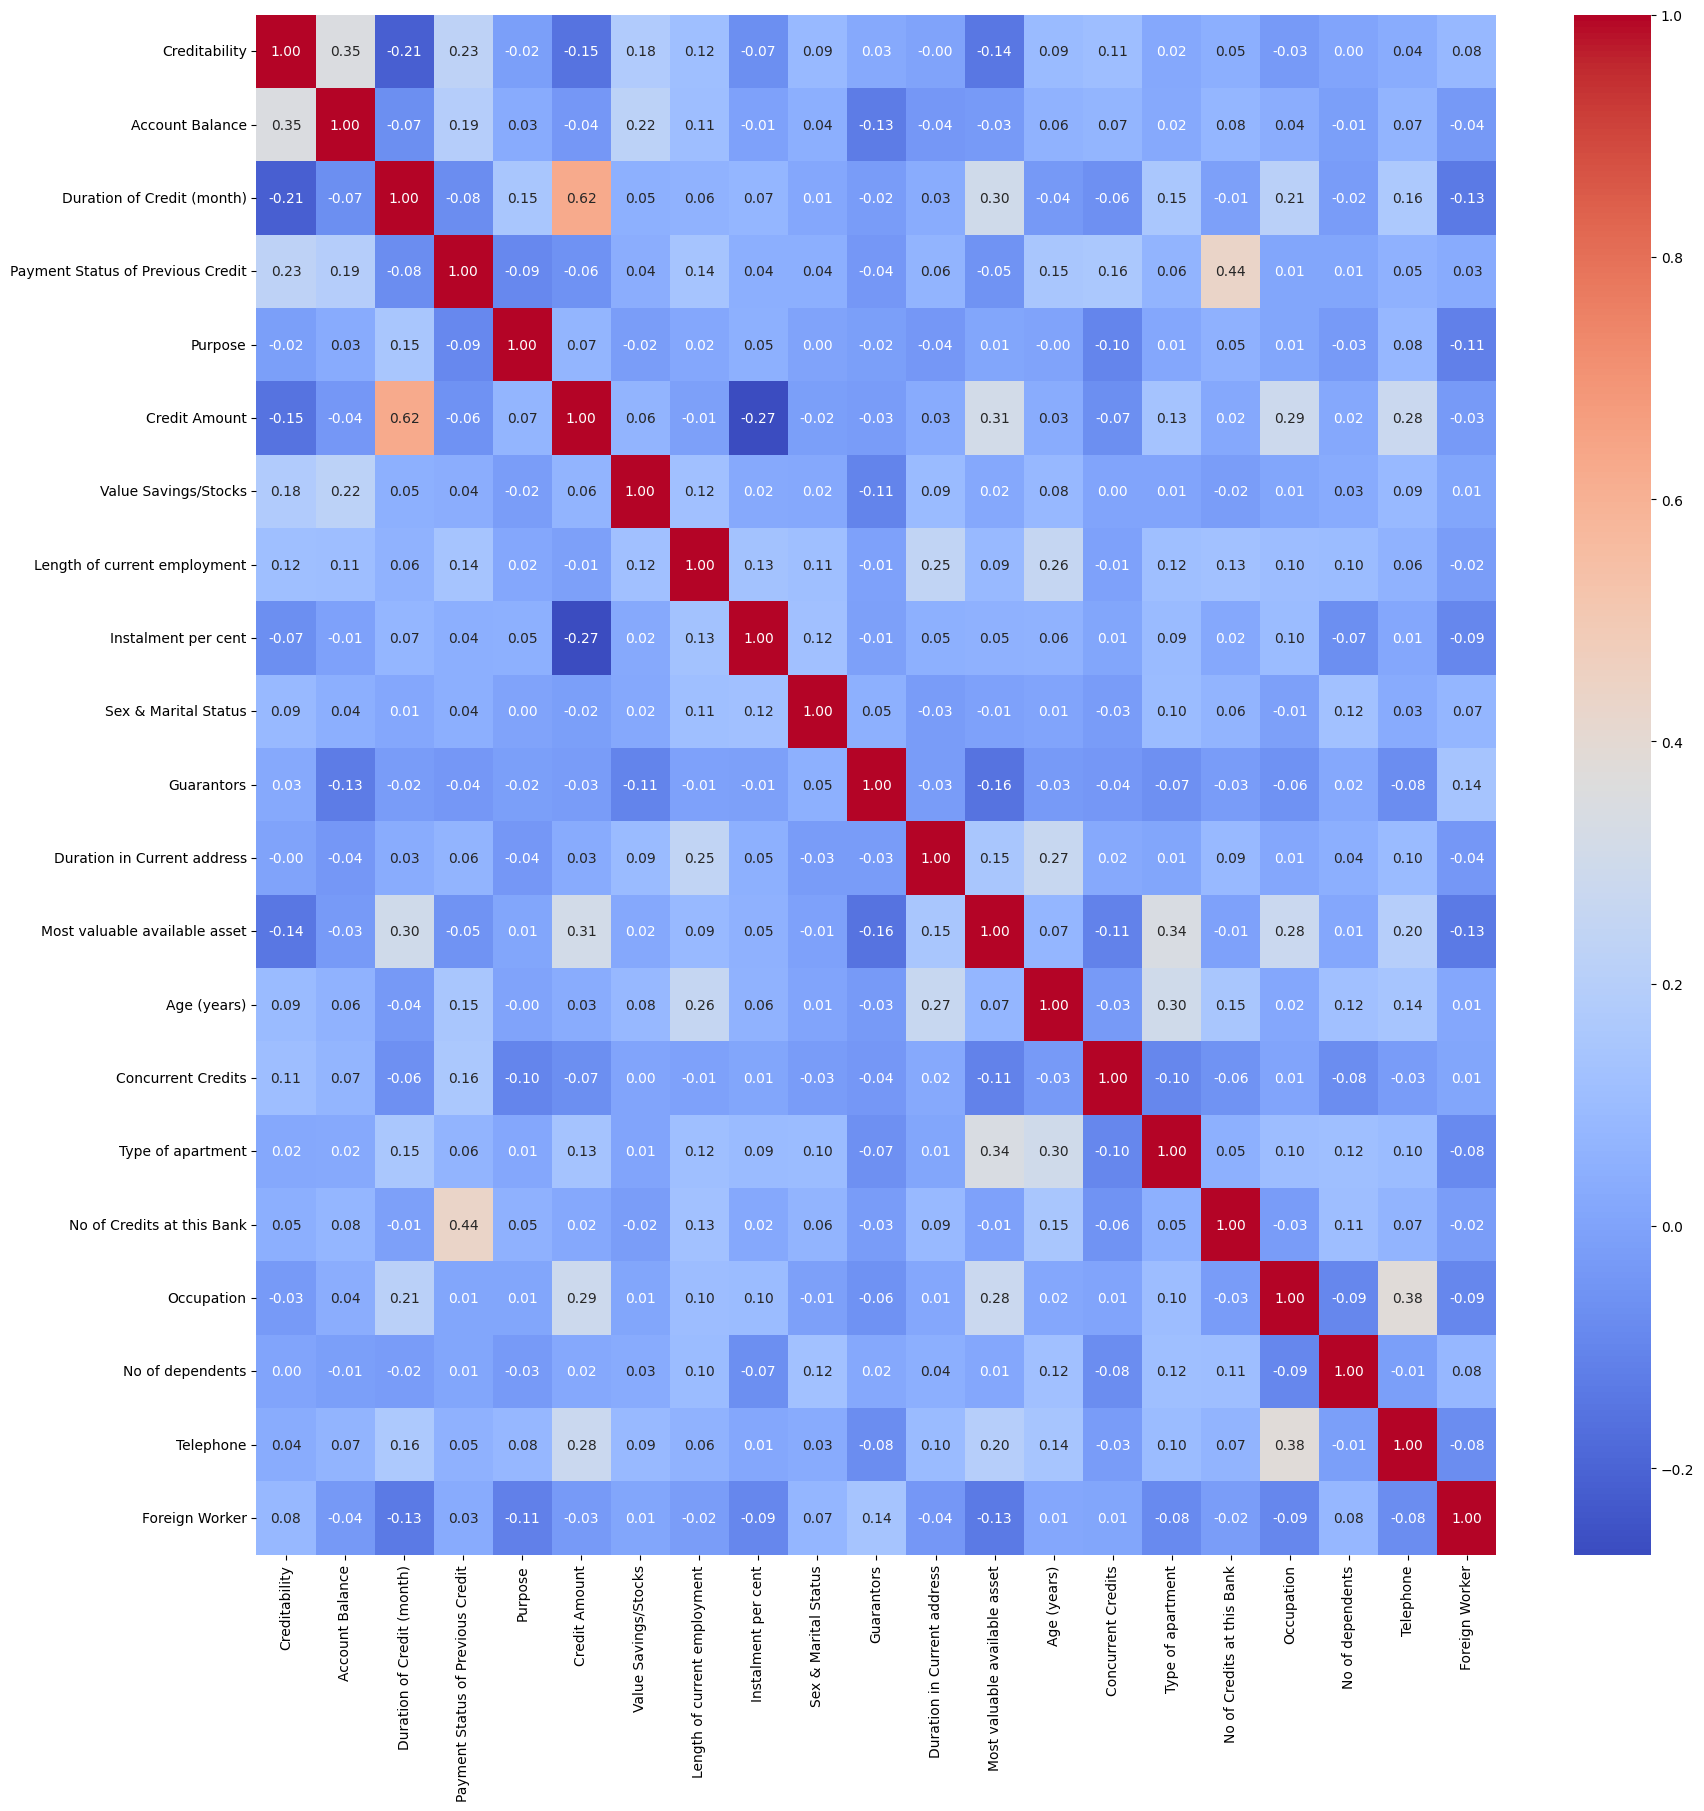

In [8]:
# do a heatmap with the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.drop(columns=['Gender', 'Age Group']).corr(), annot=True, fmt=".2f", cmap='coolwarm') 
plt.show()

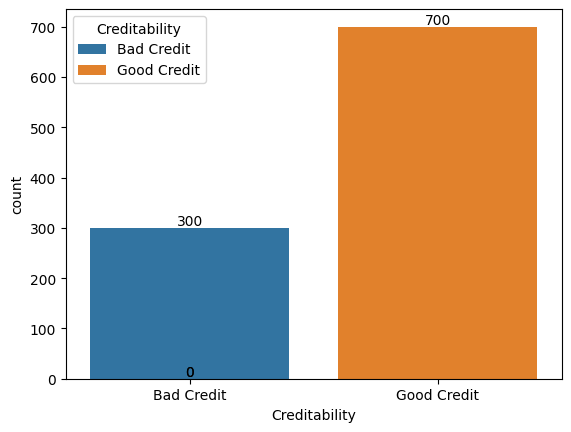

In [9]:
# --------------------------- Creditability -------------------------

# Create a count plot
plot = sns.countplot(x='Creditability', data=df, hue='Creditability', palette=['#1f77b4', '#ff7f0e'])

# Add a legend to identify what each color represents
# Each label corresponds to a different category in the 'Creditability' column
plot.legend(title='Creditability', labels=['Bad Credit', 'Good Credit'])

# Add exact counts above the bars
for patch in plot.patches:
    height = patch.get_height()  # Get the height of the bar (count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position for the text (center of the bar)
        height + 0.1,  # Y position for the text (slightly above the height of the bar)
        int(height),  # Text to display (height value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=10,  # Font size of the text
        color='black'  # Color of the text
    )

# Configure the x-axis labels
plot.set_xticks([0, 1])  # Define the ticks on the x-axis (for each category)
plot.set_xticklabels(['Bad Credit', 'Good Credit'])  # Set the labels for the ticks

# Display the plot
plt.show()

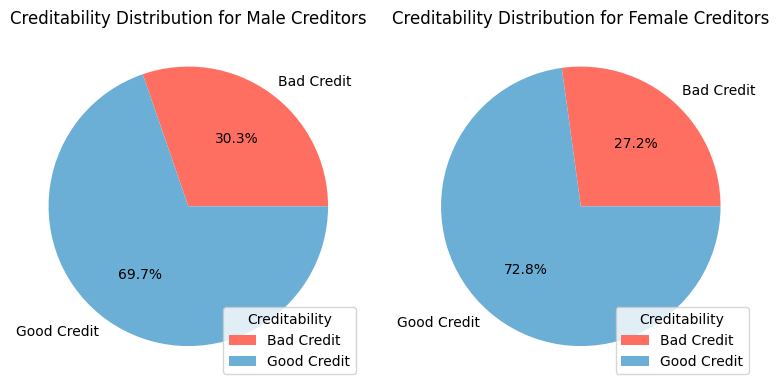

In [10]:
# --------------------------- Creditability for Male and Female -------------------------

# Filter the data for 'Male' and 'Female'
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Count the number of occurrences for each 'Creditability' category for males and females
male_creditability_count = male_data.groupby('Creditability').size().reset_index(name='Count')
female_creditability_count = female_data.groupby('Creditability').size().reset_index(name='Count')

# Set the labels for the pie charts based on creditability
creditability_labels = ['Bad Credit', 'Good Credit']

# Define the colors for the slices of the pie charts
colors = ['#ff6f61', '#6baed6']  # Different colors for 'Bad Credit' and 'Good Credit'

# Set up the creation of two pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Create a figure with two axes (charts) side by side

# Create the pie chart for male creditors
wedges_male, texts_male, autotexts_male = axes[0].pie(
    male_creditability_count['Count'],  # Data for the pie chart
    labels=creditability_labels,  # Labels for each slice
    autopct='%1.1f%%',  # Format to show percentages on the slices
    colors=colors  # Color for each slice
)

# Add a legend and title for the male chart
axes[0].legend(wedges_male, creditability_labels, title='Creditability', loc='best', fontsize='medium')
axes[0].set_title('Creditability Distribution for Male Creditors')

# Create the pie chart for female creditors
wedges_female, texts_female, autotexts_female = axes[1].pie(
    female_creditability_count['Count'],  # Data for the pie chart
    labels=creditability_labels,  # Labels for each slice
    autopct='%1.1f%%',  # Format to show percentages on the slices
    colors=colors  # Color for each slice
)

# Add a legend and title for the female chart
axes[1].legend(wedges_female, creditability_labels, title='Creditability', loc='best', fontsize='medium')
axes[1].set_title('Creditability Distribution for Female Creditors')

# Adjust the layout so that the charts do not overlap and display the charts
plt.tight_layout()  # Adjust layout for better visualization
plt.show()  # Display the charts

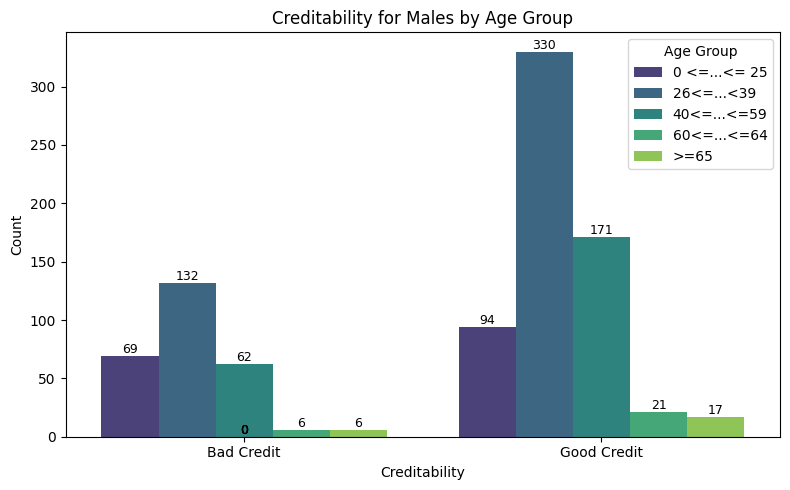

In [11]:
# ------------------------- Creditability for Males by Age Group -----------------------------

# Filter the data to only include males
df_male = df[df['Gender'] == 'Male']

# Set the size of the figure
plt.figure(figsize=(8, 5))

# Create the count plot for 'Creditability' with 'Age Group' as hue (only for Male)
plot = sns.countplot(x='Creditability', data=df_male, hue='Age Group', palette='viridis')

# Add exact counts above the bars
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=9,  # Font size of the text
        color='black'  # Color of the text
    )

# Set x-axis labels for Creditability
plot.set_xticks([0, 1])  # Set the ticks for Creditability (Bad = 0, Good = 1)
plot.set_xticklabels(['Bad Credit', 'Good Credit'])  # Label the ticks

# Add title and labels to the axes
plt.title('Creditability for Males by Age Group')
plt.xlabel('Creditability')
plt.ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

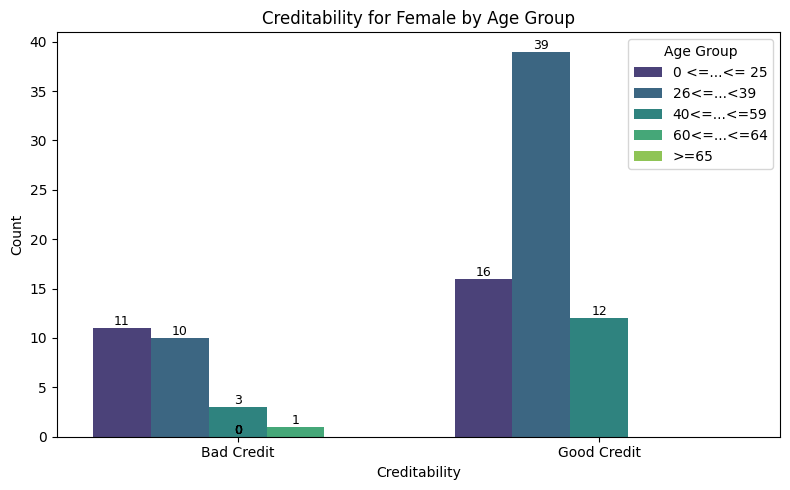

In [12]:
# --------------------- Creditability for Female by Age Group ------------------

# Filter only the case where 'Gender' is 'Female'
female_data = df[df['Gender'] == 'Female']

# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a count plot for 'Creditability' with 'Gender' as hue
plot = sns.countplot(x='Creditability', data=female_data, hue='Age Group', palette='viridis')

# Add a legend with the title 'Age Group' to distinguish age ranges
plot.legend(title='Age Group')

# Add exact counts above the bars in the count plot
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (i.e., count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=9,  # Font size of the text
        color='black'  # Color of the text
    )

# Set x-axis tick labels with 'Creditability' categories
plot.set_xticks([0, 1])  # Define ticks for 'Creditability' (0: Bad Credit, 1: Good Credit)
plot.set_xticklabels(['Bad Credit', 'Good Credit'])  # Add labels to the ticks

# Add title and labels to the axes
plt.title('Creditability for Female by Age Group')
plt.xlabel('Creditability')
plt.ylabel('Count')

# Adjust layout for better visualization and display the plot
plt.tight_layout()
plt.show()

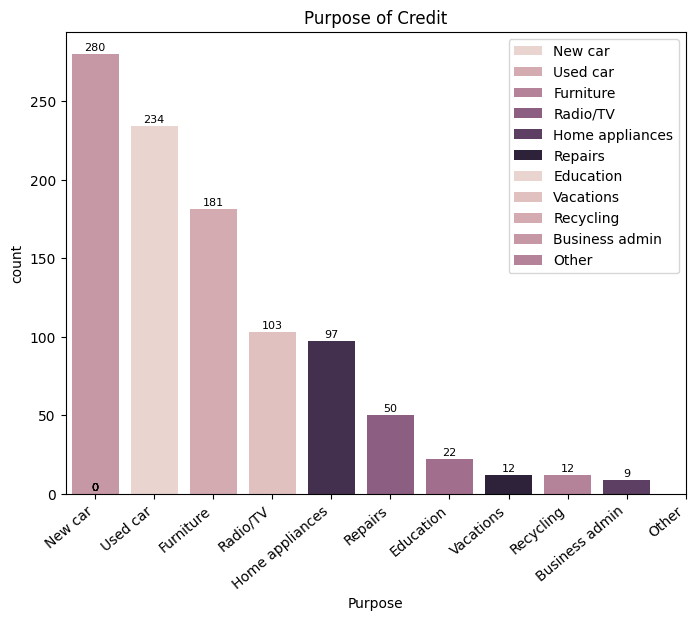

In [13]:
# ---------------------------------- Purpose --------------------------------------

plt.figure(figsize=(8, 6))

order = df['Purpose'].value_counts().index

# Create a count plot to visualize the distribution of 'Purpose' values
# The hue parameter is set to 'Purpose' to differentiate the counts by purpose categories
plot = sns.countplot(x='Purpose', data=df, hue='Purpose', order=order)

purpose_labels = ['New car', 'Used car', 'Furniture', 'Radio/TV', 'Home appliances',
                    'Repairs', 'Education', 'Vacations', 'Recycling', 'Business admin', 'Other']

# Add a legend to the plot to indicate what each color represents
# Each label corresponds to a different category in the 'Purpose' column
plot.legend(labels=purpose_labels)

# Add exact counts above the bars in the count plot
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (i.e., count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height + 1,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=8,  # Font size of the text
        color='black'  # Color of the text
    )
    
plt.title('Purpose of Credit')

# Configure x-axis tick labels with account balance names
# Set the number of ticks based on the number of categories and add labels with rotation for better readability
plot.set_xticks(range(len(purpose_labels)))  # Define the number of ticks based on categories
plot.set_xticklabels(purpose_labels, rotation=40, ha='right')  # Add labels and rotate them for better readability

# Display the plot
# This renders the plot and shows it in the output
plt.show()

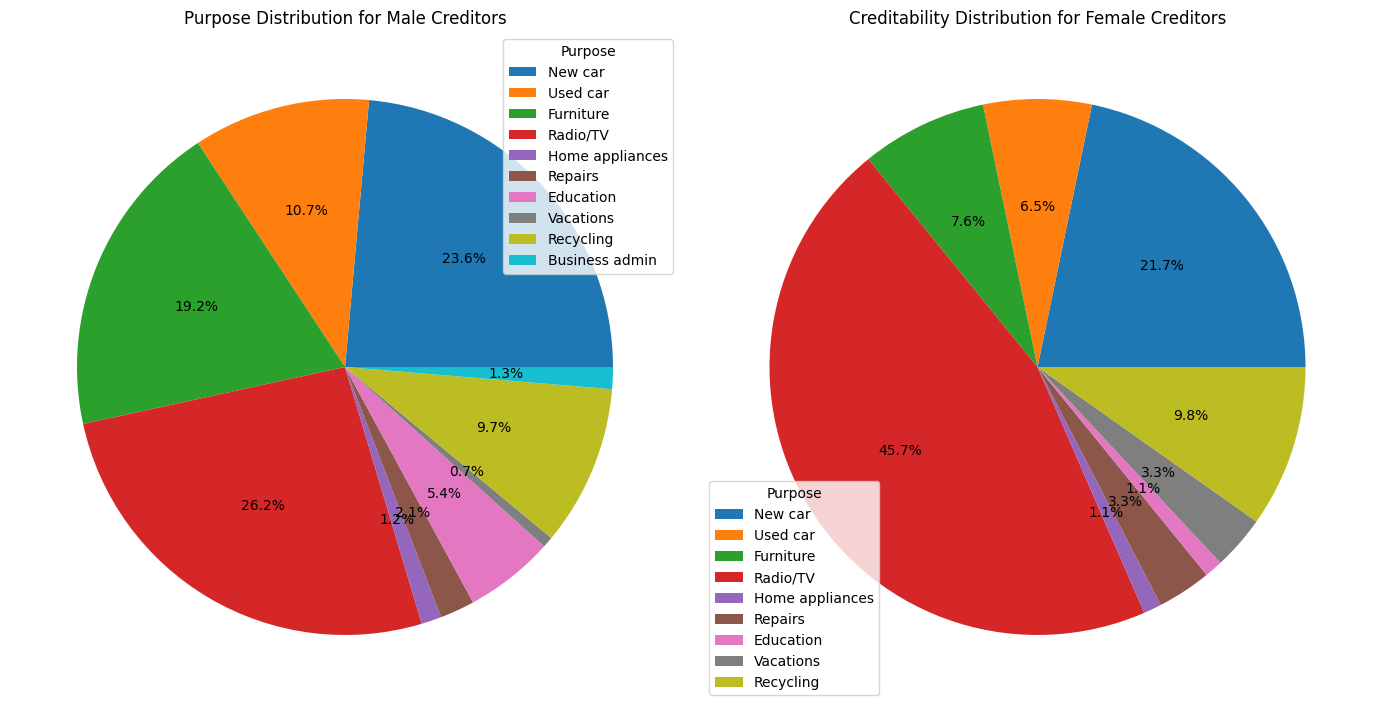

In [14]:
# --------------------------- Purpose for Male and Female -------------------------

# Filter the data for 'Male' and 'Female'
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Count the number of occurrences for each 'Creditability' category for males and females
male_purpose_count = male_data.groupby('Purpose').size().reset_index(name='Count')
female_purpose_count = female_data.groupby('Purpose').size().reset_index(name='Count')

# Set the labels for the pie charts based on purpose
purpose_labels = ['New car', 'Used car', 'Furniture', 'Radio/TV', 'Home appliances',
                  'Repairs', 'Education', 'Vacations', 'Recycling', 'Business admin', 'Other']

# Set up the creation of two pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Create a figure with two axes (charts) side by side

# Create the pie chart for male creditors
wedges_male, texts_male, autotexts_male = axes[0].pie(
    male_purpose_count['Count'],  # Data for the pie chart
    autopct='%1.1f%%'  # Format to show percentages on the slices
)

# Add a legend and title for the male chart
axes[0].legend(wedges_male, purpose_labels, title='Purpose', loc='best', fontsize='medium')
axes[0].set_title('Purpose Distribution for Male Creditors')

# Create the pie chart for female creditors
wedges_female, texts_female, autotexts_female = axes[1].pie(
    female_purpose_count['Count'],  # Data for the pie chart
    autopct='%1.1f%%',  # Format to show percentages on the slices
)

# Add a legend and title for the female chart
axes[1].legend(wedges_female, purpose_labels, title='Purpose', loc='best', fontsize='medium')
axes[1].set_title('Creditability Distribution for Female Creditors')

# Adjust the layout so that the charts do not overlap and display the charts
plt.tight_layout()  # Adjust layout for better visualization
plt.show()  # Display the charts

In [15]:
# Duration of Credit (month)	Payment Status of Previous Credit

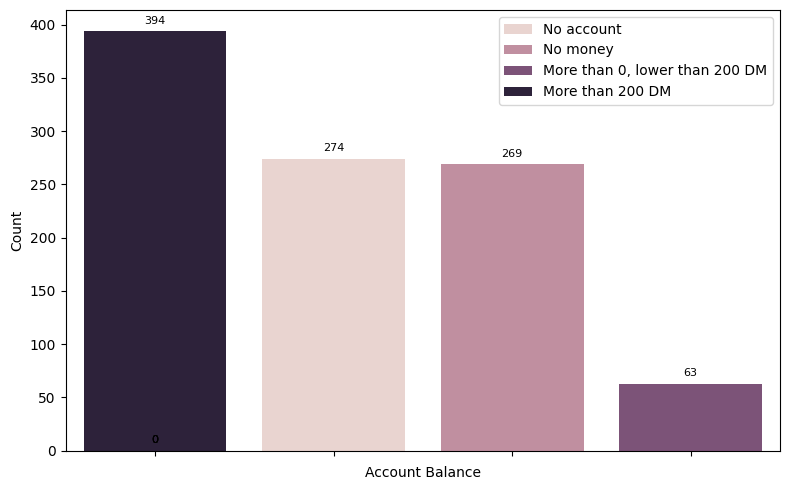

In [16]:
# --------------------- Account Balance --------------------

# Set the figure size for the plot
plt.figure(figsize=(8, 5))

order = df['Account Balance'].value_counts().index

# Create a count plot to visualize the distribution of 'Account Balance' values
# The hue parameter is set to 'Account Balance' to differentiate the counts by account balance categories
plot = sns.countplot(x='Account Balance', data=df, hue='Account Balance', order=order)

# Add a legend to the plot to indicate what each color represents
# Each label corresponds to a different category in the 'Account Balance' column
plot.legend(labels=['No account', 'No money', 'More than 0, lower than 200 DM', 'More than 200 DM'])

# Set the x-axis tick labels to be empty
# This is useful if you want to remove the default tick labels and possibly add custom ones later
plot.set_xticklabels([])

# Add exact counts above the bars in the count plot
# This provides precise values for each category in the plot
for patch in plot.patches:
    height = patch.get_height()  # Get the height of each bar (i.e., count)
    plot.text(
        patch.get_x() + patch.get_width() / 2.,  # X position of the text (center of the bar)
        height + 5,  # Y position of the text (slightly above the top of the bar)
        int(height),  # Text to display (the count value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=8,  # Font size of the text
        color='black'  # Color of the text
    )

# Add title and labels to the axes
# This helps in understanding what the plot represents

plt.xlabel('Account Balance')
plt.ylabel('Count')

# Display the plot
# This renders the plot and shows it in the output
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

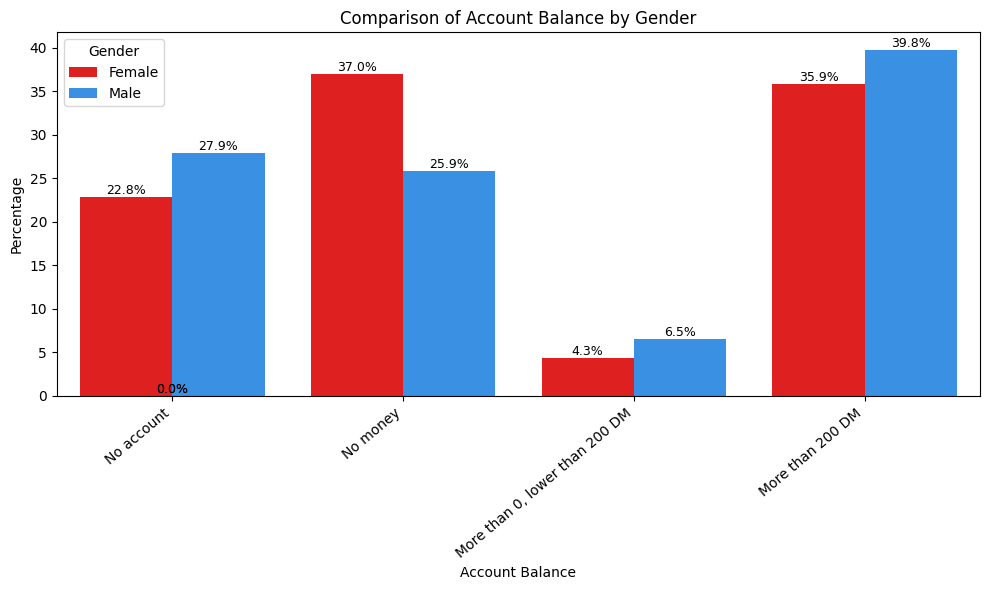

In [17]:
# ---------------------------------- Comparison of Account Balance by Gender --------------------------------------

# Calculate the counts for each Account Balance category by Gender
account_balance_counts = df.groupby(['Gender', 'Account Balance']).size().reset_index(name='Count')

account_balance_labels = ['No account', 'No money', 'More than 0, lower than 200 DM', 'More than 200 DM']

# Calculate the total counts for each Gender
total_counts = df['Gender'].value_counts().reset_index()
total_counts.columns = ['Gender', 'Total']

# Merge the total counts with the account balance counts
account_balance_counts = account_balance_counts.merge(total_counts, on='Gender')

# Calculate the percentage
account_balance_counts['Percentage'] = (account_balance_counts['Count'] / account_balance_counts['Total']) * 100

# Create the countplot with percentages
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Account Balance', y='Percentage', hue='Gender', data=account_balance_counts, palette={'Male': 'dodgerblue', 'Female': 'red'})

# Add exact percentages above the bars in the count plot
for p in plot.patches:
    height = p.get_height()
    plot.text(
        p.get_x() + p.get_width() / 2.,  # X position of the text (center of the bar)
        height,  # Y position of the text (slightly above the top of the bar)
        f'{height:.1f}%',  # Text to display (the percentage value)
        ha='center',  # Horizontal alignment of the text
        va='bottom',  # Vertical alignment of the text
        fontsize=9,  # Font size of the text
        color='black'  # Color of the text
    )
    
# Configure x-axis tick labels with account balance names
# Set the number of ticks based on the number of categories and add labels with rotation for better readability
plot.set_xticks(range(len(account_balance_labels)))  # Define the number of ticks based on categories
plot.set_xticklabels(account_balance_labels, rotation=40, ha='right')  # Add labels and rotate them for better readability

# Add title and labels to the axes
plt.title('Comparison of Account Balance by Gender')
plt.xlabel('Account Balance')
plt.ylabel('Percentage')

# Adjust layout for better visualization and display the plot
plt.tight_layout()
plt.show()

## Conclusion